# Data vectors

Here we compare the data vectors for the JMAS and SRD forecasts. We plot the relative ratio of the JMAS data vector to the SRD data vector.

In [1]:
import cmasher as cmr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
datavec_path = "jmas_data/data_vectors/"
datavec_name = f"cosmic_shear_data_vector.npy"

srd_y1 = (np.load(f"{datavec_path}srd_y1_{datavec_name}").reshape(15, 20))
srd_y10 = (np.load(f"{datavec_path}srd_y10_{datavec_name}").reshape(15, 20))

jmas_y1 = (np.load(f"{datavec_path}jmas_y1_{datavec_name}").reshape(15, 20))
jmas_y10 = (np.load(f"{datavec_path}jmas_y10_{datavec_name}").reshape(15, 20))

ells = np.load("jmas_data/scales_corrs/ell_values.npy", allow_pickle=True)
correlations = np.load("jmas_data/scales_corrs/correlations.npy", allow_pickle=True)


In [3]:
def get_ratio(data_vector, benchmark, colors):
    for index, (i, j) in enumerate(zip(data_vector, benchmark)):
        plt.semilogx(ells, i/j - 1, lw=2, c=colors[index])
        
def plot_ratios(data_vector, benchmark, ells, corrs, colors, ax):
    for idx, (i, j) in enumerate(zip(jmas_y1, srd_y1)):
        color = colors[idx % len(colors)] 
        ax.semilogx(ells, i/j-1, lw=2, c=color, label=f"{corrs[idx]}")
        
def plot_frac_diff(data_vector, benchmark, cmap, threshold=50):
    difference = ((np.absolute(data_vector - benchmark) / benchmark) * 100).T
    
    ax = sns.heatmap(difference, cmap=cmap, annot=True, fmt='.0f', annot_kws={"size":8})
    # Manually annotate each cell with dynamic color
    for i in range(difference.shape[0]):
        for j in range(difference.shape[1]):
            value = difference[i, j]
            text = f"{value:.0f}"
            text_color = "white" # if value > threshold else "black"
            ax.text(j + 0.5, i + 0.5, text, ha="center", va="center", color=text_color, fontsize=8)


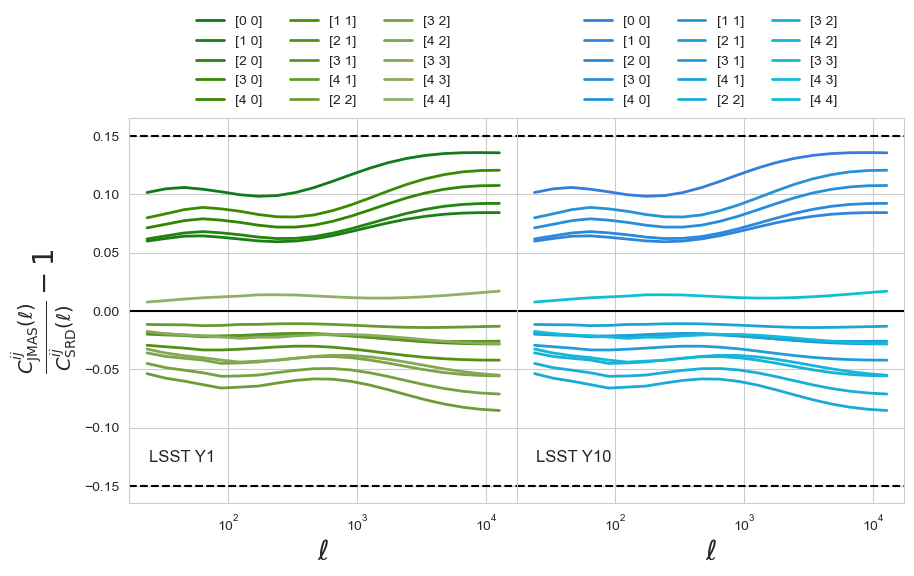

In [4]:
clry1 = cmr.take_cmap_colors('cmr.jungle',
                             len(jmas_y1),
                             cmap_range=(0.45, 0.7), 
                             return_fmt='hex')
clry10 = cmr.take_cmap_colors('cmr.cosmic', 
                              len(jmas_y10),
                              cmap_range=(0.6, 0.8),
                              return_fmt='hex') 

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True) 
# Remove spacing between subplots
fig.subplots_adjust(wspace=0)

axs[0].axhline(y=0, color='k')
axs[1].axhline(y=0, color='k')

spread = 0.15
axs[0].axhline(y=spread, color='k', ls="--")
axs[1].axhline(y=spread, color='k', ls="--")
axs[0].axhline(y=-spread, color='k', ls="--")
axs[1].axhline(y=-spread, color='k', ls="--")

# Call the modified get_ratio function for each subplot
plot_ratios(jmas_y1, srd_y1, ells, correlations, clry1, axs[0])
plot_ratios(jmas_y10, srd_y10, ells, correlations, clry10, axs[1])

ylabel = '$\\frac{C^{ij}_{\\mathrm{JMAS}} (\ell)}{C^{ij}_{\\mathrm{SRD}} (\ell)} - 1$'
axs[0].set_xlabel('$\ell$', fontsize=20)
axs[1].set_xlabel('$\ell$', fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)

# Place the legend outside the plot area
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, frameon=False)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, frameon=False)

text_position_x = 0.05  
text_position_y = 0.1
text1 = "LSST Y1" 
text10 = "LSST Y10"

axs[0].text(text_position_x,
            text_position_y, 
            text1, 
            transform=axs[0].transAxes,
            fontsize=12, 
            verticalalignment='bottom',
            horizontalalignment='left')
axs[1].text(text_position_x, 
            text_position_y, 
            text10,
            transform=axs[1].transAxes,
            fontsize=12,
            verticalalignment='bottom',
            horizontalalignment='left')

# Save the figure
plots_path = f"plots_output/data_vectors/"
plt.savefig(f"{plots_path}data_vectors_srd_jmas_ratios.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}data_vector_srd_jmas_ratios.png", bbox_inches="tight", dpi=300)


Text(52.722222222222214, 0.5, 'Multipole index')

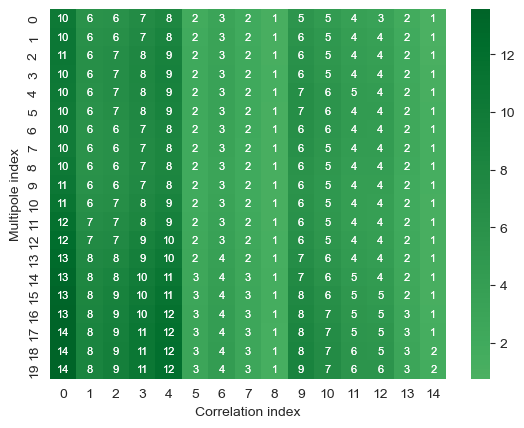

In [5]:
cmap_y1 = cmr.get_sub_cmap("Greens", 0.6, 0.9)    
plot_frac_diff(jmas_y1, srd_y1, cmap_y1)
plt.xlabel("Correlation index")
plt.ylabel("Multipole index")

Text(52.722222222222214, 0.5, 'Multipole index')

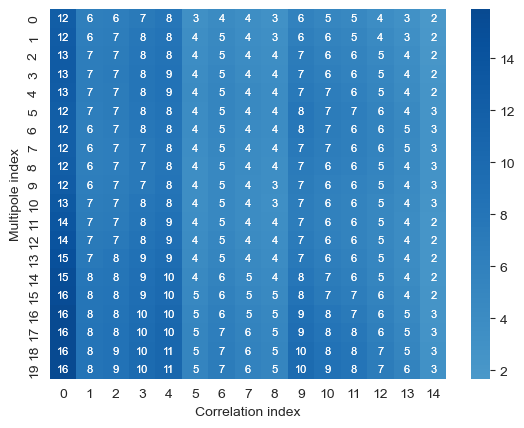

In [6]:
cmap_y10 = cmr.get_sub_cmap("Blues", 0.6, 0.9) 
plot_frac_diff(jmas_y10, srd_y10, cmap_y10)
plt.xlabel("Correlation index")
plt.ylabel("Multipole index")